# Analysis Of RCB vs SRH

In [1]:
import sys
sys.setrecursionlimit(1000)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
Matches.shape

(756, 18)

# How many rows and columns are there?

In [5]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


In [8]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

# 756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [9]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions 

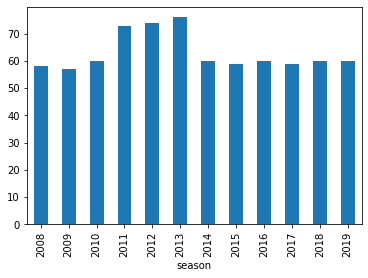

In [10]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [11]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [12]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.

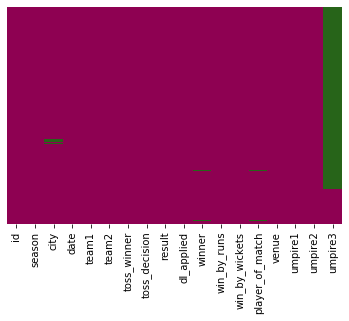

In [13]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [14]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#  Removed the columns containing more missing values and have less impact on the predicting matches
 

In [15]:
Matches=Matches.drop(['umpire3','city'],axis=1)

In [16]:
Matches.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


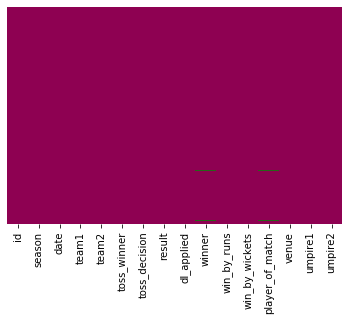

In [17]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Today's match is between MI and SRH.so we only want information between the matches that take place between them

In [18]:
Matches

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [21]:
RCB_SRH1=Matches.loc[(Matches['team1']=='Royal Challengers Bangalore')&(Matches['team2'] =='Sunrisers Hyderabad')]

In [22]:
RCB_SRH2=Matches.loc[(Matches['team2']=='Royal Challengers Bangalore')&(Matches['team1'] =='Sunrisers Hyderabad')]

In [23]:
RCB_SRH=RCB_SRH1.append(RCB_SRH2)

#   Complete details of matches that takes place between RCB and SRH

In [24]:
RCB_SRH

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
387,388,2013,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
502,503,2014,2014-05-20,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,NJ Llong
524,525,2015,2015-04-13,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,DA Warner,M Chinnaswamy Stadium,RM Deshpande,RK Illingworth
579,580,2016,2016-04-12,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma
686,7944,2018,17/05/18,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,14,0,AB de Villiers,M Chinnaswamy Stadium,S Ravi,Anil Dandekar
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
431,432,2013,2013-04-09,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium,S Ravi,SJA Taufel
480,481,2014,2014-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VA Kulkarni
567,568,2015,2015-05-15,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,1,Royal Challengers Bangalore,0,6,V Kohli,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena
602,603,2016,2016-04-30,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,15,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena


# It looks like RCB and SRH played 14 matches against each other

In [25]:
won_by_runs_wickest=RCB_SRH.groupby('id')

In [26]:
won_by_runs_wickest.sum()

,season,dl_applied,win_by_runs,win_by_wickets
id,,,,
1,2017,0,35,0
388,2013,0,0,0
432,2013,0,0,7
481,2014,0,0,4
503,2014,0,0,7
525,2015,0,0,8
568,2015,1,0,6
580,2016,0,45,0
603,2016,0,15,0


In [27]:
RCB_SRH['id'].value_counts()

7932     1
603      1
636      1
568      1
503      1
525      1
11147    1
11345    1
432      1
580      1
481      1
7944     1
388      1
1        1
Name: id, dtype: int64

In [28]:
RCB_SRH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 387 to 749
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               14 non-null     int64 
 1   season           14 non-null     int64 
 2   date             14 non-null     object
 3   team1            14 non-null     object
 4   team2            14 non-null     object
 5   toss_winner      14 non-null     object
 6   toss_decision    14 non-null     object
 7   result           14 non-null     object
 8   dl_applied       14 non-null     int64 
 9   winner           14 non-null     object
 10  win_by_runs      14 non-null     int64 
 11  win_by_wickets   14 non-null     int64 
 12  player_of_match  14 non-null     object
 13  venue            14 non-null     object
 14  umpire1          14 non-null     object
 15  umpire2          14 non-null     object
dtypes: int64(5), object(11)
memory usage: 1.9+ KB


In [29]:
RCB_SRH.describe

<bound method NDFrame.describe of         id  season        date                        team1  \
387    388    2013  2013-04-07  Royal Challengers Bangalore   
502    503    2014  2014-05-20  Royal Challengers Bangalore   
524    525    2015  2015-04-13  Royal Challengers Bangalore   
579    580    2016  2016-04-12  Royal Challengers Bangalore   
686   7944    2018    17/05/18  Royal Challengers Bangalore   
0        1    2017  2017-04-05          Sunrisers Hyderabad   
431    432    2013  2013-04-09          Sunrisers Hyderabad   
480    481    2014  2014-05-04          Sunrisers Hyderabad   
567    568    2015  2015-05-15          Sunrisers Hyderabad   
602    603    2016  2016-04-30          Sunrisers Hyderabad   
635    636    2016  2016-05-29          Sunrisers Hyderabad   
674   7932    2018    07/05/18          Sunrisers Hyderabad   
706  11147    2019    31/03/19          Sunrisers Hyderabad   
749  11345    2019    04/05/19          Sunrisers Hyderabad   

                    

In [31]:
print("No of matches that takes place between RCB and SRH:",len(RCB_SRH))

No of matches that takes place between RCB and SRH: 14


# Below plot gives the details of the match that takes place between RCB and SRH

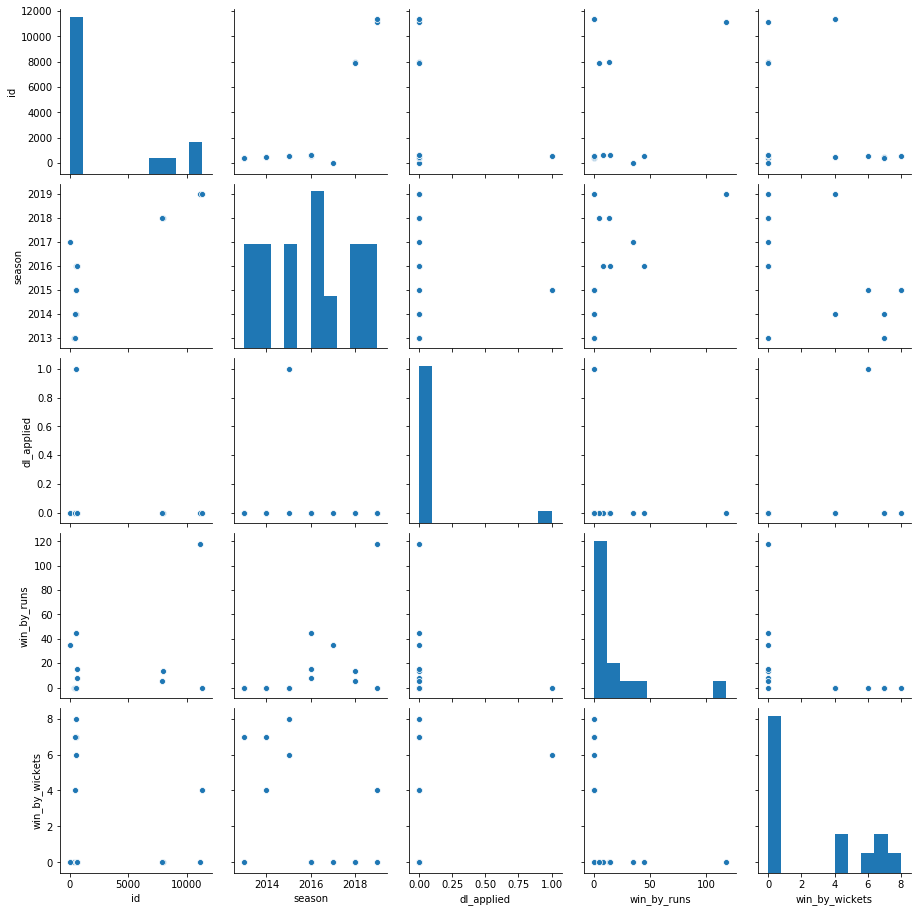

In [32]:
sns.pairplot(RCB_SRH)

# Now Time to answer the questions that were asked in the widhya ipl

In [33]:
RCB_SRH['toss_winner'].value_counts()

Royal Challengers Bangalore    8
Sunrisers Hyderabad            6
Name: toss_winner, dtype: int64

# Sometimes Toss plays an crucial role in deciding the winner.RCB win the Toss 8 times and SRH win it 6 times

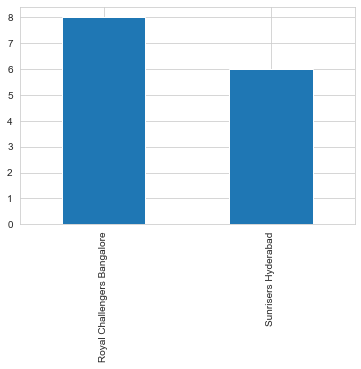

In [35]:
sns.set_style('whitegrid')
RCB_SRH['toss_winner'].value_counts().plot(kind='bar')

In [38]:
print("No of times toss win by both teams:")
RCB_SRH['toss_winner'].value_counts()

No of times toss win by both teams:


Royal Challengers Bangalore    8
Sunrisers Hyderabad            6
Name: toss_winner, dtype: int64

# From 14 matches Royal challengers Bangalore win 2 Times by Batting First and 4 times by Batting Second whereas Sunrises Hyderabad  win 3 times by batting first and 5 times by batting second.

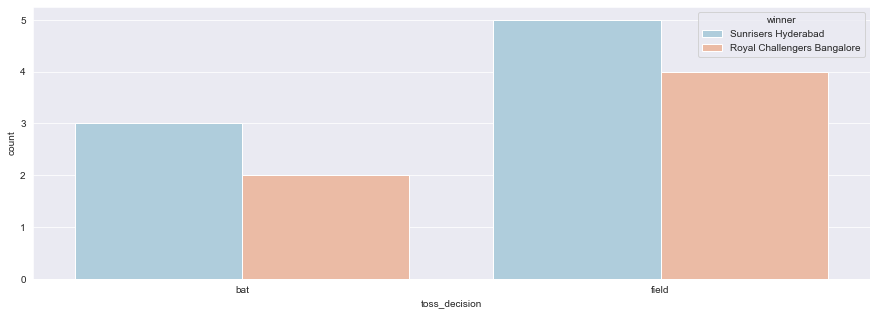

In [41]:
import sys
sys.setrecursionlimit(10000) 
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_decision',hue='winner',data=RCB_SRH,palette='RdBu_r')

In [42]:
RCB_SRH['winner'].value_counts()

Sunrisers Hyderabad            8
Royal Challengers Bangalore    6
Name: winner, dtype: int64

# It looks like MI and SRH produces some Tough competition.SRH(win-8,loss-6),RCB(win-6,loss-8)

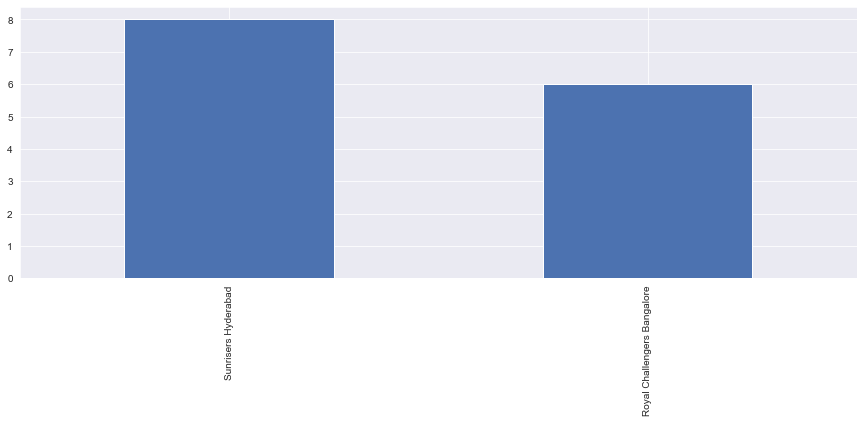

In [43]:
RCB_SRH['winner'].value_counts().plot(kind='bar')

# Complete details RCB_SRH using sweetviz library

In [44]:
import sweetviz 
my_report=sweetviz.analyze([RCB_SRH,"RCB_SRH"])

:FEATURES DONE:                    |                     | [  0%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [45]:
my_report.show_html()

In [44]:
print("From 14 matches SRH win 8 times")

From 14 matches Both teams win 7 times each


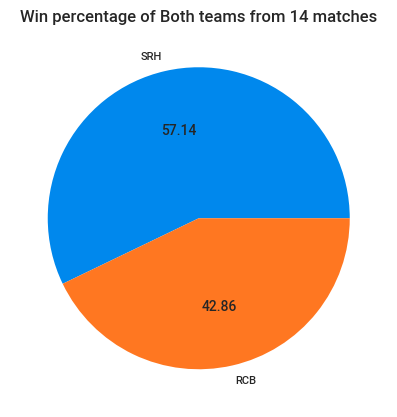

In [48]:
values=[8,6]
label=['SRH','RCB']
plt.pie(x=values,labels=label,autopct='%.2f')
plt.title("Win percentage of Both teams from 14 matches")
plt.show()

# Now it's time to move into deliveries data sets

In [49]:
Deliveries=pd.read_csv("deliveries.csv")

In [50]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [51]:
Deliveries.tail(5)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [52]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Filtering the match details that only takes place between Rajastan Royals and Sunrises Hyderabad

In [55]:
Bangalore_Hyderabad1=Deliveries.loc[(Deliveries['batting_team' ] =='Royal Challengers Bangalore' ) & (Deliveries['bowling_team'] == 'Sunrisers Hyderabad')]

In [56]:
Bangalore_Hyderabad2=Deliveries.loc[(Deliveries['bowling_team' ] =='Royal Challengers Bangalore' ) & (Deliveries['batting_team'] == 'Sunrisers Hyderabad')]

In [57]:
Bangalore_Hyderabad=Bangalore_Hyderabad1.append(Bangalore_Hyderabad2)

In [58]:
Bangalore_Hyderabad

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177511,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177512,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177513,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,KS Williamson,B Kumar,UT Yadav,0,...,0,0,1,0,3,1,4,NaN,NaN,NaN
177514,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [59]:
Bangalore_Hyderabad['match_id'].value_counts()

388      261
481      250
636      250
580      250
7932     249
1        248
603      246
11345    246
7944     245
503      244
11147    244
525      237
432      235
568      106
Name: match_id, dtype: int64

In [60]:
Bangalore_Hyderabad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311 entries, 125 to 177515
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          3311 non-null   int64 
 1   inning            3311 non-null   int64 
 2   batting_team      3311 non-null   object
 3   bowling_team      3311 non-null   object
 4   over              3311 non-null   int64 
 5   ball              3311 non-null   int64 
 6   batsman           3311 non-null   object
 7   non_striker       3311 non-null   object
 8   bowler            3311 non-null   object
 9   is_super_over     3311 non-null   int64 
 10  wide_runs         3311 non-null   int64 
 11  bye_runs          3311 non-null   int64 
 12  legbye_runs       3311 non-null   int64 
 13  noball_runs       3311 non-null   int64 
 14  penalty_runs      3311 non-null   int64 
 15  batsman_runs      3311 non-null   int64 
 16  extra_runs        3311 non-null   int64 
 17  total_runs

In [61]:
Bangalore_Hyderabad.describe

<bound method NDFrame.describe of         match_id  inning                 batting_team  \
125            1       2  Royal Challengers Bangalore   
126            1       2  Royal Challengers Bangalore   
127            1       2  Royal Challengers Bangalore   
128            1       2  Royal Challengers Bangalore   
129            1       2  Royal Challengers Bangalore   
...          ...     ...                          ...   
177511     11345       1          Sunrisers Hyderabad   
177512     11345       1          Sunrisers Hyderabad   
177513     11345       1          Sunrisers Hyderabad   
177514     11345       1          Sunrisers Hyderabad   
177515     11345       1          Sunrisers Hyderabad   

                       bowling_team  over  ball        batsman    non_striker  \
125             Sunrisers Hyderabad     1     1       CH Gayle  Mandeep Singh   
126             Sunrisers Hyderabad     1     2  Mandeep Singh       CH Gayle   
127             Sunrisers Hyderabad   

# Check For any Null values

In [62]:
Bangalore_Hyderabad.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
player_dismissed    3149
dismissal_kind      3149
fielder             3186
dtype: int64

# Looks like we have huge null(NaN) values in  player_dismissed,dismissal_kind,fielder columns

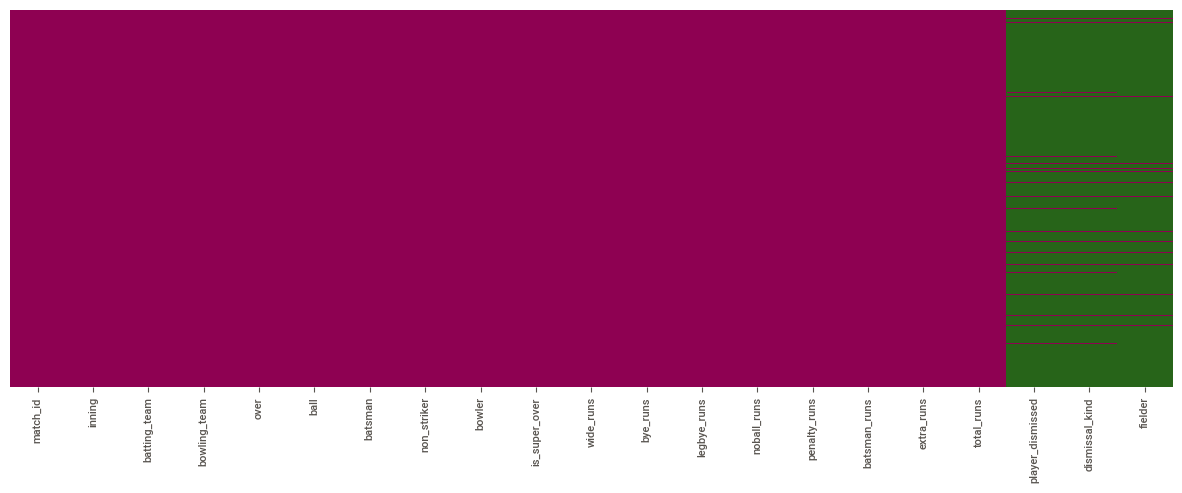

In [63]:
sns.heatmap(Bangalore_Hyderabad.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Replace the NaN values to 0

In [64]:
Bangalore_Hyderabad.fillna(0,inplace=True)

# Now it's clear

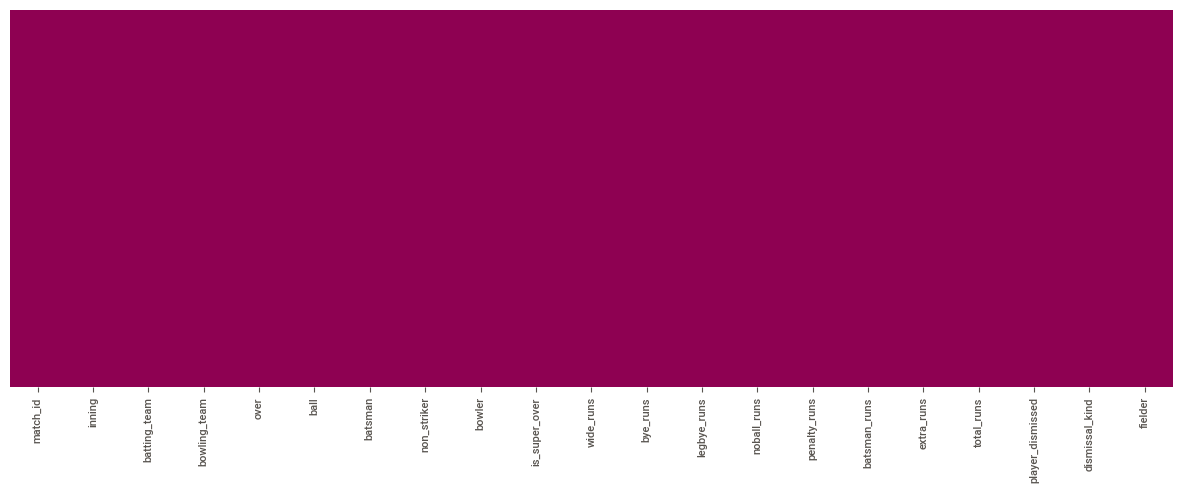

In [65]:
sns.heatmap(Bangalore_Hyderabad.isnull(),yticklabels=False,cbar=False,cmap='PiYG')                      

# # Let's try covariance to find relation among features

In [66]:
Bangalore_Hyderabad.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.821493e+07,9.210334,828.250262,-60.284818,-10.949065,-35.023821,5.479878,-13.622060,-5.237585,0.0,95.257017,-48.403588,46.853429
inning,9.210334e+00,0.265169,-0.128177,-0.003881,0.007718,-0.000920,0.000919,0.001115,-0.000440,0.0,-0.016152,0.000675,-0.015478
over,8.282503e+02,-0.128177,33.206685,-0.009684,-0.036110,-0.007686,0.007453,0.026682,0.001352,0.0,0.797394,0.027802,0.825195
ball,-6.028482e+01,-0.003881,-0.009684,3.277442,0.000578,-0.008309,-0.000141,-0.003692,-0.000631,0.0,-0.088686,-0.012773,-0.101459
is_super_over,-1.094906e+01,0.007718,-0.036110,0.000578,0.003912,-0.000155,-0.000014,-0.000065,0.000287,0.0,0.004795,0.000052,0.004847
wide_runs,-3.502382e+01,-0.000920,-0.007686,-0.008309,-0.000155,0.071848,-0.000143,-0.000657,-0.000155,0.0,-0.047333,0.070892,0.023559
bye_runs,5.479878e+00,0.000919,0.007453,-0.000141,-0.000014,-0.000143,0.007238,-0.000060,-0.000014,0.0,0.000081,0.007020,0.007100
legbye_runs,-1.362206e+01,0.001115,0.026682,-0.003692,-0.000065,-0.000657,-0.000060,0.025404,-0.000065,0.0,-0.019545,0.024621,0.005076
noball_runs,-5.237585e+00,-0.000440,0.001352,-0.000631,0.000287,-0.000155,-0.000014,-0.000065,0.003912,0.0,0.002680,0.003677,0.006358
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# it's diffult to interpret covariance.Let's try correlation.Correlation clearly mentions using discrete values 1=positively correlated,-1=Negatively correlated,0=No correlation.

In [67]:
Bangalore_Hyderabad.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.004191,0.033677,-0.007802,-0.041017,-0.030616,0.015092,-0.020025,-0.019621,NaN,0.012912,-0.034800,0.006374
inning,0.004191,1.000000,-0.043195,-0.004163,0.239616,-0.006665,0.020976,0.013587,-0.013647,NaN,-0.018145,0.004020,-0.017452
over,0.033677,-0.043195,1.000000,-0.000928,-0.100187,-0.004976,0.015203,0.029051,0.003751,NaN,0.080049,0.014804,0.083147
ball,-0.007802,-0.004163,-0.000928,1.000000,0.005101,-0.017124,-0.000914,-0.012794,-0.005571,NaN,-0.028339,-0.021649,-0.032541
is_super_over,-0.041017,0.239616,-0.100187,0.005101,1.000000,-0.009269,-0.002675,-0.006544,0.073285,NaN,0.044351,0.002543,0.044997
wide_runs,-0.030616,-0.006665,-0.004976,-0.017124,-0.009269,1.000000,-0.006290,-0.015388,-0.009269,NaN,-0.102153,0.811534,0.051033
bye_runs,0.015092,0.020976,0.015203,-0.000914,-0.002675,-0.006290,1.000000,-0.004441,-0.002675,NaN,0.000548,0.253186,0.048460
legbye_runs,-0.020025,0.013587,0.029051,-0.012794,-0.006544,-0.015388,-0.004441,1.000000,-0.006544,NaN,-0.070939,0.473994,0.018491
noball_runs,-0.019621,-0.013647,0.003751,-0.005571,0.073285,-0.009269,-0.002675,-0.006544,1.000000,NaN,0.024791,0.180398,0.059020
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# # Ball by Ball Details of RCB VS SRH From 14 matches 

In [69]:
Bangalore_Hyderabad

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,0,0,0
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,0,0,0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,0,0,0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,0,0,0
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177511,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,6,0,6,0,0,0
177512,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,4,0,4,0,0,0
177513,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,KS Williamson,B Kumar,UT Yadav,0,...,0,0,1,0,3,1,4,0,0,0
177514,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,1,0,1,0,0,0


In [70]:
Complete_Details=Bangalore_Hyderabad.groupby('match_id')

In [71]:
Complete_Details.sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
1,371,2571,900,0,9,0,2,2,0,366,13,379
388,418,2587,945,13,13,1,10,1,0,270,25,295
432,345,2390,852,0,8,0,1,1,0,313,10,323
481,373,2596,913,0,10,0,4,1,0,298,15,313
503,365,2561,872,0,7,3,4,0,0,307,14,321
525,348,2343,877,0,21,0,9,2,0,306,32,338
568,142,541,387,0,4,0,2,2,0,210,8,218
580,375,2628,910,0,13,1,3,1,0,391,18,409
603,368,2580,883,0,5,1,1,1,0,365,8,373


# From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

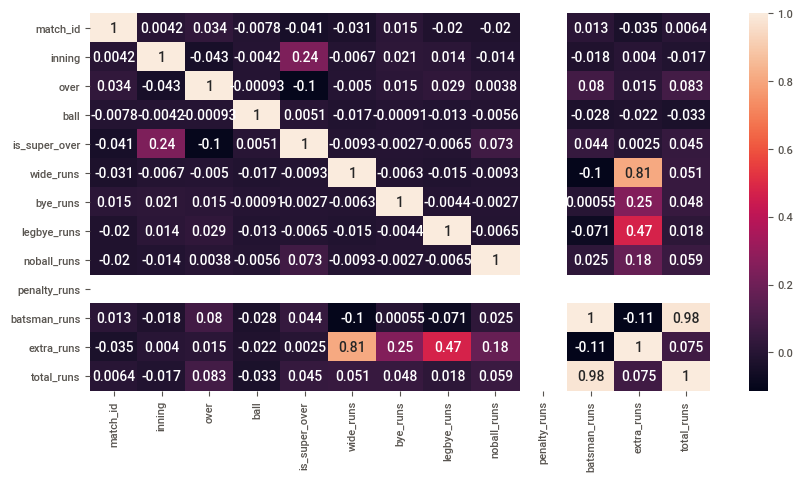

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(Bangalore_Hyderabad.corr(),yticklabels=True,annot=True)

# How many wickets ll fall in total during the powerplay for both teams?

In [76]:
Bangalore_Hyderabad_PP=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['over']<=6)]

In [77]:
Bangalore_Hyderabad_PP['dismissal_kind'].value_counts()

0                    1026
caught                 24
bowled                  8
lbw                     2
caught and bowled       1
stumped                 1
run out                 1
Name: dismissal_kind, dtype: int64

In [78]:
len(Bangalore_Hyderabad['match_id'].value_counts())

14

In [79]:
print("Average number of wickets fall in total during the power play for both teams",37//14)

Average number of wickets fall in total during the power play for both teams 2


# what ll be sandeep sharma's Economy rate and how many boundaries ll he give away?

In [80]:
sandeep_sharmas_Economy_rate=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['bowler']=='Sandeep Sharma')]

In [81]:
sandeep_sharmas_Economy_Rate=sandeep_sharmas_Economy_rate.loc[(sandeep_sharmas_Economy_rate['noball_runs']==0)&(sandeep_sharmas_Economy_rate['wide_runs']==0)]

In [82]:
sandeep_sharmas_Economy_Rate['batsman_runs'].sum()

58

In [87]:
sandeep_sharmas_Economy_Rate['batsman_runs'].value_counts()

1    20
0    18
4     5
2     3
6     2
Name: batsman_runs, dtype: int64

In [83]:
len(sandeep_sharmas_Economy_Rate['match_id'].value_counts())

2

In [84]:
sandeep_sharmas_Economy_Rate['over'].value_counts()

1     12
15     6
14     6
13     6
10     6
8      6
3      6
Name: over, dtype: int64

In [85]:
sandeep_sharmas_Economy_Rate['ball'].value_counts()

6    8
5    8
4    8
3    8
2    7
1    7
7    2
Name: ball, dtype: int64

In [88]:
print("Average economy of Sandeep sharma against RCB in a single match",58//8)

Average economy of Sandeep sharma against RCB in a single match 7


In [89]:
print("Average Boundaries given by Sandeep sharma against RCB in a single match",8/2)

Average Boundaries given by Sandeep sharma against RCB in a single match 4.0


# which batsman ll have highest runs scored off boundaries-runs scored off 1's,2's,3's to total runs ?

# Virat_kholi_Ratio

In [90]:
Virat_kholi_Ratio=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['batsman']=='V Kohli')]

In [91]:
Virat_kholi_Ratio['batsman_runs'].value_counts()

0    143
1    130
4     50
2     25
6     21
3      1
Name: batsman_runs, dtype: int64

In [92]:
Virat_kholi_Ratio['batsman_runs'].sum()

509

In [128]:
print("Ratio of virat kholi is",((326-181)/509))

Ratio of virat kholi is 0.28487229862475444


# AB_de_Villiers_Ratio

In [95]:
AB_de_Villiers_Ratio=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['batsman']=='AB de Villiers')]

In [96]:
AB_de_Villiers_Ratio['batsman_runs'].value_counts()

1    100
0     74
4     35
6     21
2     13
Name: batsman_runs, dtype: int64

In [97]:
AB_de_Villiers_Ratio['batsman_runs'].sum()

392

In [125]:
print("Ratio of AB de Villiers is",((266-126)/392))

Ratio of AB de Villiers is 0.35714285714285715


# Manish_Pandey_Ratio

In [100]:
Manish_Pandey_Ratio=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['batsman']=='MK Pandey')]

In [101]:
Manish_Pandey_Ratio['batsman_runs'].value_counts()

1    26
0    19
4     8
2     5
6     2
Name: batsman_runs, dtype: int64

In [102]:
Manish_Pandey_Ratio['batsman_runs'].sum()

80

In [124]:
print("Ratio of Manish Pandey is",((44-36)/80))

Ratio of Manish Pandey is 0.1


# Saha_Ratio

In [105]:
Saha_Ratio=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['batsman']=='WP Saha')]

In [106]:
Saha_Ratio['batsman_runs'].value_counts()

1    6
4    4
0    4
6    1
2    1
Name: batsman_runs, dtype: int64

In [107]:
Saha_Ratio['batsman_runs'].sum()

30

In [123]:
print("Ratio of Wriddhiman Saha is",((22-8)/30))

Ratio of Wriddhiman Saha is 0.4666666666666667


# Warner_Ratio

In [109]:
Warner_Ratio=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['batsman']=='DA Warner')]

In [110]:
Warner_Ratio['batsman_runs'].value_counts()

1    124
0    104
4     46
2     33
6     31
3      1
Name: batsman_runs, dtype: int64

In [111]:
Warner_Ratio['batsman_runs'].sum()

563

In [122]:
print("Ratio of David Warner is",((370-193)/563))

Ratio of David Warner is 0.31438721136767317


# Williamson_Ratio

In [114]:
Williamson_Ratio=Bangalore_Hyderabad.loc[(Bangalore_Hyderabad['batsman']=='KS Williamson')]

In [115]:
Williamson_Ratio['batsman_runs'].value_counts()

1    90
0    42
4    24
6    11
2     5
3     2
Name: batsman_runs, dtype: int64

In [116]:
Williamson_Ratio['batsman_runs'].sum()

268

In [120]:
print("Ratio of Williamson is",((162-106)/268))

Ratio of Williamson is 0.208955223880597


In [200]:
print("Ratio of David Warner is",((370-193)/563))
print("Ratio of Williamson is",((162-106)/268))
print("Ratio of Wriddhiman Saha is",((22-8)/30))
print("Ratio of Manish Pandey is",((44-36)/80))
print("Ratio of virat kholi is",((326-181)/509))
print("Ratio of AB de Villiers is",((266-126)/392))

Ratio of David Warner is 0.31438721136767317
Ratio of Williamson is 0.208955223880597
Ratio of Wriddhiman Saha is 0.4666666666666667
Ratio of Manish Pandey is 0.1
Ratio of virat kholi is 0.28487229862475444
Ratio of AB de Villiers is 0.35714285714285715


# How many batsman from both teams ll have strike rate more than 130 and hit more than 3 boundaries(atleast 4's)?

# Virat Kholi Strike Rate

In [129]:
Virat_kholi_ratio=Virat_kholi_Ratio.loc[(Virat_kholi_Ratio['noball_runs']==0)&(Virat_kholi_Ratio['wide_runs']==0)]

In [130]:
Virat_kholi_ratio['batsman_runs'].sum()

509

In [135]:
Virat_kholi_ratio['batsman_runs'].value_counts()

1    130
0    129
4     50
2     25
6     21
3      1
Name: batsman_runs, dtype: int64

In [131]:
Virat_kholi_ratio['ball'].value_counts()

5    66
2    58
6    57
1    56
4    54
3    52
7    10
8     3
Name: ball, dtype: int64

In [132]:
len(Virat_kholi_ratio['match_id'].value_counts())

13

In [181]:
print("Average strike rate of virat kholi is",(509/356)*100)

Average strike rate of virat kholi is 142.97752808988764


In [137]:
print("Average boundaries(4's) hit by virat kholi in a single match",50//13)

Average boundaries(4's) hit by virat kholi in a single match 3


# AB_de_Villiers Strike Rate

In [139]:
AB_de_Villiers_ratio=AB_de_Villiers_Ratio.loc[(AB_de_Villiers_Ratio['noball_runs']==0)&(AB_de_Villiers_Ratio['wide_runs']==0)]

In [140]:
AB_de_Villiers_ratio['batsman_runs'].sum()

389

In [141]:
AB_de_Villiers_ratio['batsman_runs'].value_counts()

1    97
0    67
4    35
6    21
2    13
Name: batsman_runs, dtype: int64

In [146]:
AB_de_Villiers_ratio['ball'].value_counts()

4    44
5    39
2    39
1    39
3    34
6    33
7     5
Name: ball, dtype: int64

In [142]:
len(AB_de_Villiers_ratio['match_id'].value_counts())

12

In [180]:
print("Average strike rate of AB de Villiers is",(389/233)*100)

Average strike rate of AB de Villiers is 166.95278969957081


In [144]:
print("Average boundaries(4's) hit by AB de Villiers in a single match",35//12)

Average boundaries(4's) hit by AB de Villiers in a single match 3


# Manish_Pandey_Strike rate

In [164]:
Manish_Pandey_ratio=Manish_Pandey_Ratio.loc[(Manish_Pandey_Ratio['noball_runs']==0)&(Manish_Pandey_Ratio['wide_runs']==0)]

In [165]:
Manish_Pandey_ratio['batsman_runs'].sum()

77

In [166]:
Manish_Pandey_ratio['batsman_runs'].value_counts()

1    23
0    19
4     8
2     5
6     2
Name: batsman_runs, dtype: int64

In [167]:
Manish_Pandey_ratio['ball'].value_counts()

2    13
3    10
6     9
5     8
1     8
4     6
7     3
Name: ball, dtype: int64

In [161]:
len(Manish_Pandey_ratio['match_id'].value_counts())

3

In [211]:
print("Average strike rate of Manish Pandey  is",(77/57)*100)

Average strike rate of Manish Pandey  is 135.08771929824562


In [210]:
print("Average boundaries(4's) hit by Manish Pandey in a single match",8//3)

Average boundaries(4's) hit by Manish Pandey in a single match 2


# wriddhiman Saha Strike Rate

In [170]:
Saha_ratio=Saha_Ratio.loc[(Saha_Ratio['noball_runs']==0)&(Saha_Ratio['wide_runs']==0)]

In [171]:
Saha_ratio['batsman_runs'].sum()

30

In [172]:
Saha_ratio['batsman_runs'].value_counts()

1    6
4    4
0    4
6    1
2    1
Name: batsman_runs, dtype: int64

In [173]:
Saha_ratio['ball'].value_counts()

3    4
6    3
4    3
1    3
5    2
2    1
Name: ball, dtype: int64

In [174]:
len(Saha_ratio['match_id'].value_counts())

2

In [207]:
print("Average strike rate of Saha is",(30/16)*100)

Average strike rate of Saha is 187.5


In [208]:
print("Average boundaries(4's) hit by Saha in a single match",4//2)

Average boundaries(4's) hit by Saha in a single match 2


# David Warner Strike Rate

In [182]:
Warner_ratio=Warner_Ratio.loc[(Warner_Ratio['noball_runs']==0)&(Warner_Ratio['wide_runs']==0)]

In [183]:
Warner_ratio['batsman_runs'].sum()

558

In [184]:
Warner_ratio['batsman_runs'].value_counts()

1    123
0     93
4     45
2     33
6     31
3      1
Name: batsman_runs, dtype: int64

In [185]:
Warner_ratio['ball'].value_counts()

2    59
3    58
4    55
1    54
5    52
6    40
7     5
8     3
Name: ball, dtype: int64

In [186]:
len(Warner_ratio['match_id'].value_counts())

9

In [206]:
print("Average strike rate of Warner is",(558/326)*100)

Average strike rate of Warner is 171.16564417177915


In [205]:
print("Average boundaries(4's) hit by Warner in a single match",45//9)

Average boundaries(4's) hit by Warner in a single match 5


# Williamson Strike Rate

In [191]:
Williamson_ratio=Williamson_Ratio.loc[(Williamson_Ratio['noball_runs']==0)&(Williamson_Ratio['wide_runs']==0)]

In [192]:
Williamson_ratio['batsman_runs'].sum()

261

In [193]:
Williamson_ratio['batsman_runs'].value_counts()

1    86
0    42
4    24
6    11
2     5
3     1
Name: batsman_runs, dtype: int64

In [194]:
Williamson_ratio['ball'].value_counts()

6    30
1    30
4    29
2    26
3    25
5    24
7     5
Name: ball, dtype: int64

In [195]:
len(Williamson_ratio['match_id'].value_counts())

5

In [204]:
print("Average strike rate of Williamson is",(261/169)*100)

Average strike rate of Williamson is 154.4378698224852


In [203]:
print("Average boundaries(4's) hit by Williamson  in a single match",24//5)

Average boundaries(4's) hit by Williamson  in a single match 4


In [202]:
print("Average strike rate of virat kholi is",(509/356)*100)
print("Average boundaries(4's) hit by virat kholi in a single match:",50//13)
print("Average strike rate of AB de Villiers is",(389/233)*100)
print("Average boundaries(4's) hit by AB de Villiers in a single match:",35//12)
print("Average strike rate of Manish_Pandey",(77/57)*100)
print("Average boundaries(4's) hit by Manish_Pandey_ratio in a single match:",8//3)
print("Average strike rate of Saha is",(30/16)*100)
print("Average boundaries(4's) hit by Saha in a single match:",4//2)
print("Average strike rate of Warner is",(558/326)*100)
print("Average boundaries(4's) hit by Warner in a single match:",45//9)
print("Average strike rate of Williamson is",(261/169)*100)
print("Average boundaries(4's) hit by Williamson in a single match:",24//5)

Average strike rate of virat kholi is 142.97752808988764
Average boundaries(4's) hit by virat kholi in a single match: 3
Average strike rate of AB de Villiers is 166.95278969957081
Average boundaries(4's) hit by AB de Villiers in a single match: 2
Average strike rate of Manish_Pandey 135.08771929824562
Average boundaries(4's) hit by Manish_Pandey_ratio in a single match: 2
Average strike rate of Saha is 187.5
Average boundaries(4's) hit by Saha in a single match: 2
Average strike rate of Warner is 171.16564417177915
Average boundaries(4's) hit by Warner in a single match: 5
Average strike rate of Williamson is 154.4378698224852
Average boundaries(4's) hit by Williamson in a single match: 4
